In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 16.5 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
from ultralytics import YOLO

yolo_weights_path = "/kaggle/input/yolov10dlcv/yolov10n.pt"  

if os.path.exists(yolo_weights_path):
    print("YOLOv11 weights found!")
    model = YOLO(yolo_weights_path)  
    model.info()
else:
    print("YOLOv11 weights not found! Check the path.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv11 weights found!
YOLOv10n summary: 223 layers, 2,775,520 parameters, 2,775,504 gradients, 8.7 GFLOPs


In [3]:
from ultralytics import YOLO

try:
    # Load the model
    model = YOLO(yolo_weights_path)
    print("YOLOv11 model loaded successfully!")
except Exception as e:
    print("YOLOv11 model could not be loaded.")
    print(e)

YOLOv11 model loaded successfully!


In [4]:
from ultralytics import YOLO

# Path to the YOLOv11 weights and dataset YAML file
yolo_weights_path = "/kaggle/input/yolov10dlcv/yolov10n.pt"
data_yaml_path = "/kaggle/input/v11yaml/data.yaml"

# Load the YOLOv11 model with pre-trained weights
model = YOLO(yolo_weights_path)

# Start training the model
model.train(
    data=data_yaml_path,           # Path to the dataset YAML file
    epochs=100,                    # Number of training epochs
    batch=16,                      # Batch size
    imgsz=640,                     # Image size (640x640 in this case)
    project='/kaggle/working',     # Directory to save the results
    name='yolo10n_xray_training',  # Folder name where results will be saved
    exist_ok=True                  # Allows overwriting existing results
)



Ultralytics 8.3.111 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/yolov10dlcv/yolov10n.pt, data=/kaggle/input/v11yaml/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working, name=yolo10n_xray_training, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.5 ms, read: 7.3±2.6 MB/s, size: 35.6 KB)


train: Scanning /kaggle/input/xraydlcv2/train/labels... 3186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3186/3186 [00:15<00:00, 208.27it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/xraydlcv2/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.3±1.4 MB/s, size: 30.3 KB)


val: Scanning /kaggle/input/xraydlcv2/valid/labels... 956 images, 0 backgrounds, 0 corrupt: 100%|██████████| 956/956 [00:04<00:00, 204.78it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/xraydlcv2/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/yolo10n_xray_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo10n_xray_training
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.88G       2.21      8.255      2.418         11        640: 100%|██████████| 200/200 [00:48<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


                   all        956       2317      0.554      0.338      0.327      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.85G      2.158      5.474       2.31          3        640: 100%|██████████| 200/200 [00:45<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.63it/s]


                   all        956       2317      0.609      0.505      0.525      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.86G      2.164      4.461      2.292          9        640: 100%|██████████| 200/200 [00:45<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]


                   all        956       2317      0.632      0.539      0.577      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.86G      2.144      3.817      2.308          4        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.85it/s]


                   all        956       2317      0.664       0.57      0.615      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.86G      2.105      3.334      2.286          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        956       2317      0.712      0.615      0.671      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.86G       2.03      2.921      2.257          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        956       2317      0.744      0.648      0.713      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.86G          2      2.662      2.246         10        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        956       2317      0.791      0.651      0.725      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.86G      1.943      2.455      2.207          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


                   all        956       2317      0.779      0.669       0.74      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.86G      1.938      2.346      2.208          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]


                   all        956       2317      0.802      0.679      0.758      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.86G       1.91       2.27      2.201          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        956       2317      0.795      0.677      0.744      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.86G      1.902      2.132      2.203          9        640: 100%|██████████| 200/200 [00:46<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]


                   all        956       2317      0.803      0.704      0.765      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.86G      1.859      2.045      2.168          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


                   all        956       2317      0.736      0.696      0.766      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.86G      1.834      1.991      2.173         10        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.66it/s]


                   all        956       2317      0.759       0.71      0.792      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.86G      1.837      1.972      2.169          4        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


                   all        956       2317      0.853      0.721      0.796      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.86G       1.81      1.896      2.163          9        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]


                   all        956       2317      0.874      0.741      0.814      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.86G      1.796      1.832      2.149          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.93it/s]


                   all        956       2317      0.836      0.722      0.808      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.86G      1.805       1.82      2.165         12        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


                   all        956       2317      0.895      0.735      0.824      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.86G      1.792      1.767      2.142          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        956       2317      0.861      0.742      0.813      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.86G      1.765      1.751      2.144          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]

                   all        956       2317      0.807      0.757      0.826      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.86G      1.762      1.719      2.142          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]


                   all        956       2317      0.807      0.753      0.819      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.86G      1.738      1.669      2.127         11        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]

                   all        956       2317      0.875      0.771      0.837      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.86G      1.714      1.642      2.114         13        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]

                   all        956       2317      0.824      0.755       0.83      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.86G      1.717      1.614      2.106          3        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


                   all        956       2317      0.871      0.766      0.836      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.86G      1.706      1.576       2.12          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]

                   all        956       2317      0.841      0.759      0.835       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.86G      1.714      1.592      2.113          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.00it/s]

                   all        956       2317      0.859      0.777      0.842        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.86G      1.704      1.593      2.109          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]


                   all        956       2317      0.849       0.77      0.834      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.86G      1.685      1.539      2.097         14        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]

                   all        956       2317      0.836      0.779      0.842      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.86G      1.682      1.535      2.104          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]

                   all        956       2317      0.901       0.77      0.841      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.86G      1.662      1.534      2.088          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]


                   all        956       2317      0.835      0.775      0.835      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.86G       1.67      1.509      2.091          1        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        956       2317      0.829      0.793      0.837      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.86G      1.652      1.469      2.081          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]


                   all        956       2317      0.829      0.804       0.85      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.86G      1.649      1.431      2.075          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.94it/s]

                   all        956       2317       0.85      0.789      0.851      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.86G      1.626      1.433      2.064         14        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.97it/s]

                   all        956       2317      0.856      0.804      0.851      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.86G      1.629      1.392      2.077         14        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]


                   all        956       2317      0.854      0.795      0.848       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.86G      1.607      1.395      2.057          9        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]

                   all        956       2317      0.843      0.787       0.85      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.86G      1.615      1.405       2.08          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        956       2317      0.857      0.798      0.855      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.86G      1.603      1.388      2.073          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.93it/s]

                   all        956       2317      0.843      0.798      0.854      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.86G      1.617      1.347       2.06          3        640: 100%|██████████| 200/200 [00:45<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]

                   all        956       2317      0.851      0.813      0.861      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.86G      1.593      1.369      2.056          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]


                   all        956       2317      0.863      0.812      0.858      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.86G      1.569      1.282      2.037         12        640: 100%|██████████| 200/200 [00:45<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.93it/s]

                   all        956       2317      0.834      0.819      0.859      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.86G      1.578      1.332      2.053         16        640: 100%|██████████| 200/200 [00:45<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.88it/s]

                   all        956       2317      0.845      0.813      0.859      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.86G      1.566      1.299      2.043          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


                   all        956       2317      0.865      0.797       0.86      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.86G      1.574      1.301       2.05          3        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]

                   all        956       2317      0.878      0.816      0.864      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.86G      1.551      1.253       2.04          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]

                   all        956       2317      0.852      0.804      0.856      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.86G      1.543      1.286      2.045          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]

                   all        956       2317      0.888      0.788      0.856       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.86G      1.521      1.256      2.031          9        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]


                   all        956       2317      0.896      0.793      0.863      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.86G      1.509      1.228      2.023         13        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]

                   all        956       2317      0.895      0.802      0.863      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.86G      1.515      1.208      2.022          9        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.88it/s]

                   all        956       2317      0.878      0.796      0.857      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.86G      1.523      1.217      2.019         13        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]

                   all        956       2317      0.891      0.805      0.858      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.86G      1.521      1.208      2.028         14        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]

                   all        956       2317      0.864      0.804      0.861      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.86G      1.497      1.201      2.023          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]

                   all        956       2317       0.85       0.81      0.857      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.86G      1.502       1.17      2.007          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]

                   all        956       2317      0.866        0.8      0.859      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.86G      1.506      1.187      2.014         11        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]

                   all        956       2317      0.873      0.824      0.866      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.86G      1.492      1.174      2.004         12        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]

                   all        956       2317      0.878      0.823      0.864      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.86G       1.48      1.163      2.002         10        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]

                   all        956       2317      0.891      0.809      0.863      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.86G      1.484      1.155      1.996          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]

                   all        956       2317      0.888      0.804      0.861      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.86G      1.445      1.111      1.995          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        956       2317      0.887      0.813      0.859       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.86G      1.461      1.115      1.993         10        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.94it/s]

                   all        956       2317      0.872      0.821      0.865      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.86G      1.442      1.126      1.989         10        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]

                   all        956       2317      0.879      0.811      0.863      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.86G      1.479      1.133      2.001          2        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]

                   all        956       2317      0.879      0.831      0.868      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.86G      1.444      1.102      1.984         16        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]

                   all        956       2317      0.875      0.821      0.865      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.86G      1.421      1.086      1.982          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]

                   all        956       2317      0.885      0.815      0.868      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.86G      1.418      1.084      1.972          4        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.03it/s]

                   all        956       2317      0.882      0.809      0.863      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.86G      1.408      1.038      1.975          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]

                   all        956       2317      0.893      0.815      0.864      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.86G      1.409      1.062      1.986         10        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.00it/s]

                   all        956       2317      0.896      0.806      0.867      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.86G      1.425      1.071      1.974         18        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]

                   all        956       2317       0.88      0.825      0.869      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.86G      1.387      1.048      1.953          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.94it/s]

                   all        956       2317      0.883       0.82      0.869      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.86G      1.395      1.022      1.958         11        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]

                   all        956       2317      0.895      0.827      0.871      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.86G      1.396      1.029      1.969         12        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]

                   all        956       2317      0.882       0.82       0.87      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.86G      1.386      1.012       1.96         20        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.94it/s]

                   all        956       2317      0.917      0.813      0.867      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.86G      1.392     0.9904       1.96         14        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


                   all        956       2317      0.891      0.822      0.871      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.86G      1.361     0.9774       1.95         23        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]

                   all        956       2317      0.865      0.838      0.872      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.86G      1.366      0.972      1.952          9        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]

                   all        956       2317       0.91       0.82       0.87      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.86G       1.36     0.9873      1.958          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]

                   all        956       2317      0.893      0.825      0.869      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.86G       1.37     0.9767      1.954          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.04it/s]

                   all        956       2317      0.918      0.822      0.874      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.86G      1.353     0.9695      1.949          3        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.88it/s]

                   all        956       2317      0.911      0.815      0.874      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.86G      1.351     0.9616      1.946          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]

                   all        956       2317      0.903       0.82       0.87      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.86G      1.346     0.9734      1.946         12        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.04it/s]

                   all        956       2317      0.899      0.827      0.873      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.86G      1.336     0.9452      1.942         14        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]

                   all        956       2317      0.891       0.83      0.874      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.86G      1.347     0.9558      1.943         15        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]

                   all        956       2317      0.895      0.821       0.87      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.86G      1.322      0.928      1.937          8        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.97it/s]

                   all        956       2317      0.904      0.821      0.873      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.86G      1.301     0.9142      1.927          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]

                   all        956       2317      0.898      0.817       0.87       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.86G      1.322     0.9136      1.936         10        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.05it/s]

                   all        956       2317      0.899      0.815      0.869      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.86G      1.315     0.9314      1.932          4        640: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  5.00it/s]


                   all        956       2317      0.894      0.817      0.873      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.86G      1.301     0.9073      1.929          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.00it/s]

                   all        956       2317      0.877      0.835      0.871      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.86G      1.279     0.8772       1.92          5        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]

                   all        956       2317      0.892      0.827      0.871      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.86G      1.287     0.9072      1.926          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        956       2317      0.909       0.82      0.873      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.86G      1.275     0.8857      1.908          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]

                   all        956       2317      0.899      0.829      0.873      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.86G       1.27     0.8717      1.912          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]


                   all        956       2317      0.878      0.834      0.871       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.86G      1.272     0.8785      1.916          7        640: 100%|██████████| 200/200 [00:45<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


                   all        956       2317      0.887      0.835      0.871      0.758
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.86G      1.037     0.5969      1.779          6        640: 100%|██████████| 200/200 [00:45<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]

                   all        956       2317        0.9       0.82      0.867      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.86G      1.007     0.5725      1.769          8        640: 100%|██████████| 200/200 [00:44<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.93it/s]

                   all        956       2317        0.9       0.82       0.87      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.86G      1.006     0.5638       1.76          2        640: 100%|██████████| 200/200 [00:44<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]

                   all        956       2317      0.878      0.835      0.869      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.86G     0.9949     0.5611       1.76          4        640: 100%|██████████| 200/200 [00:44<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]

                   all        956       2317      0.892      0.832      0.871      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.86G     0.9865     0.5398      1.755          5        640: 100%|██████████| 200/200 [00:44<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]

                   all        956       2317      0.892      0.823       0.87       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.86G     0.9872     0.5542      1.755          3        640: 100%|██████████| 200/200 [00:44<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.02it/s]

                   all        956       2317      0.898      0.819      0.868       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.86G     0.9746      0.535      1.739          3        640: 100%|██████████| 200/200 [00:44<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.85it/s]

                   all        956       2317      0.889      0.826      0.868       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.86G     0.9776     0.5299      1.744          4        640: 100%|██████████| 200/200 [00:44<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]

                   all        956       2317      0.898      0.828      0.871      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.86G     0.9652     0.5296      1.742          4        640: 100%|██████████| 200/200 [00:44<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]

                   all        956       2317      0.878       0.84      0.871      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.86G     0.9597     0.5292       1.74          3        640: 100%|██████████| 200/200 [00:44<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]

                   all        956       2317      0.877      0.841      0.872      0.764



100 epochs completed in 1.442 hours.
Optimizer stripped from /kaggle/working/yolo10n_xray_training/weights/last.pt, 5.7MB
Optimizer stripped from /kaggle/working/yolo10n_xray_training/weights/best.pt, 5.7MB

Validating /kaggle/working/yolo10n_xray_training/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,267,703 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]


                   all        956       2317      0.898      0.829      0.873      0.765
                  Cans         83         87      0.945      0.793      0.887      0.797
          CartonDrinks        208        228      0.986      0.937      0.984      0.841
           GlassBottle         32         45      0.266      0.178      0.131       0.11
         PlasticBottle        462        607      0.892      0.867      0.921      0.813
             SprayCans         87         96       0.97      0.615      0.761      0.651
        SwissArmyKnife        113        114      0.983      0.939      0.974      0.769
                   Tin         82         93      0.973       0.86      0.925      0.816
             VacuumCup        182        192      0.891      0.938      0.967       0.87
                 blade        263        398      0.971      0.935      0.977      0.781
                dagger        121        122      0.959      0.949       0.98      0.922
                 knif

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /kaggle/working/yolo10n_xray_training


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccf58697970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

📊 results.png


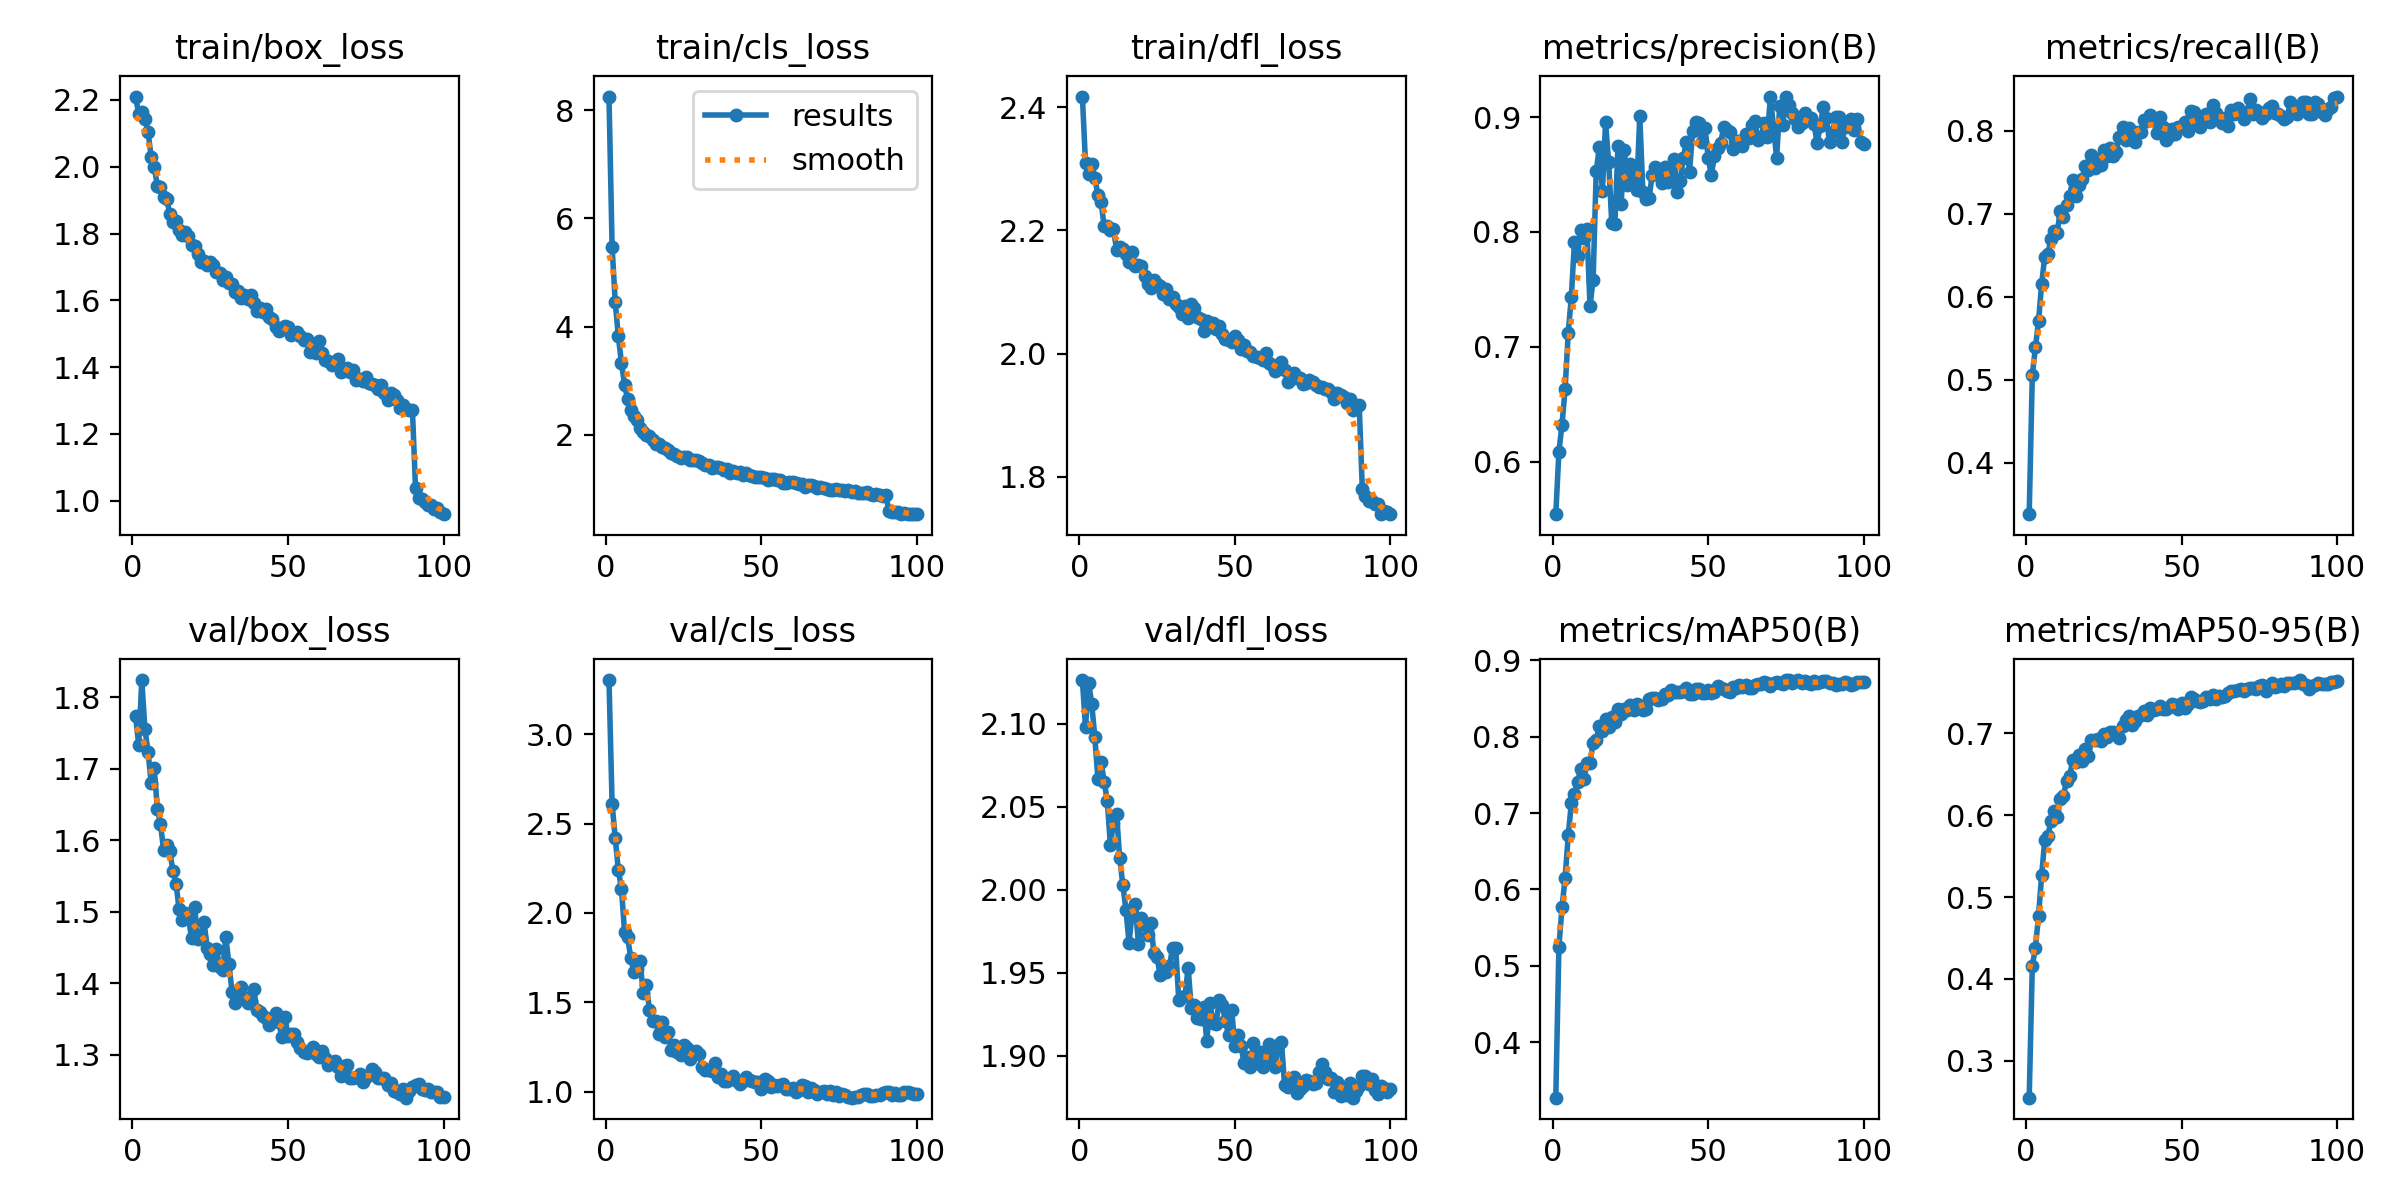

📊 P_curve.png


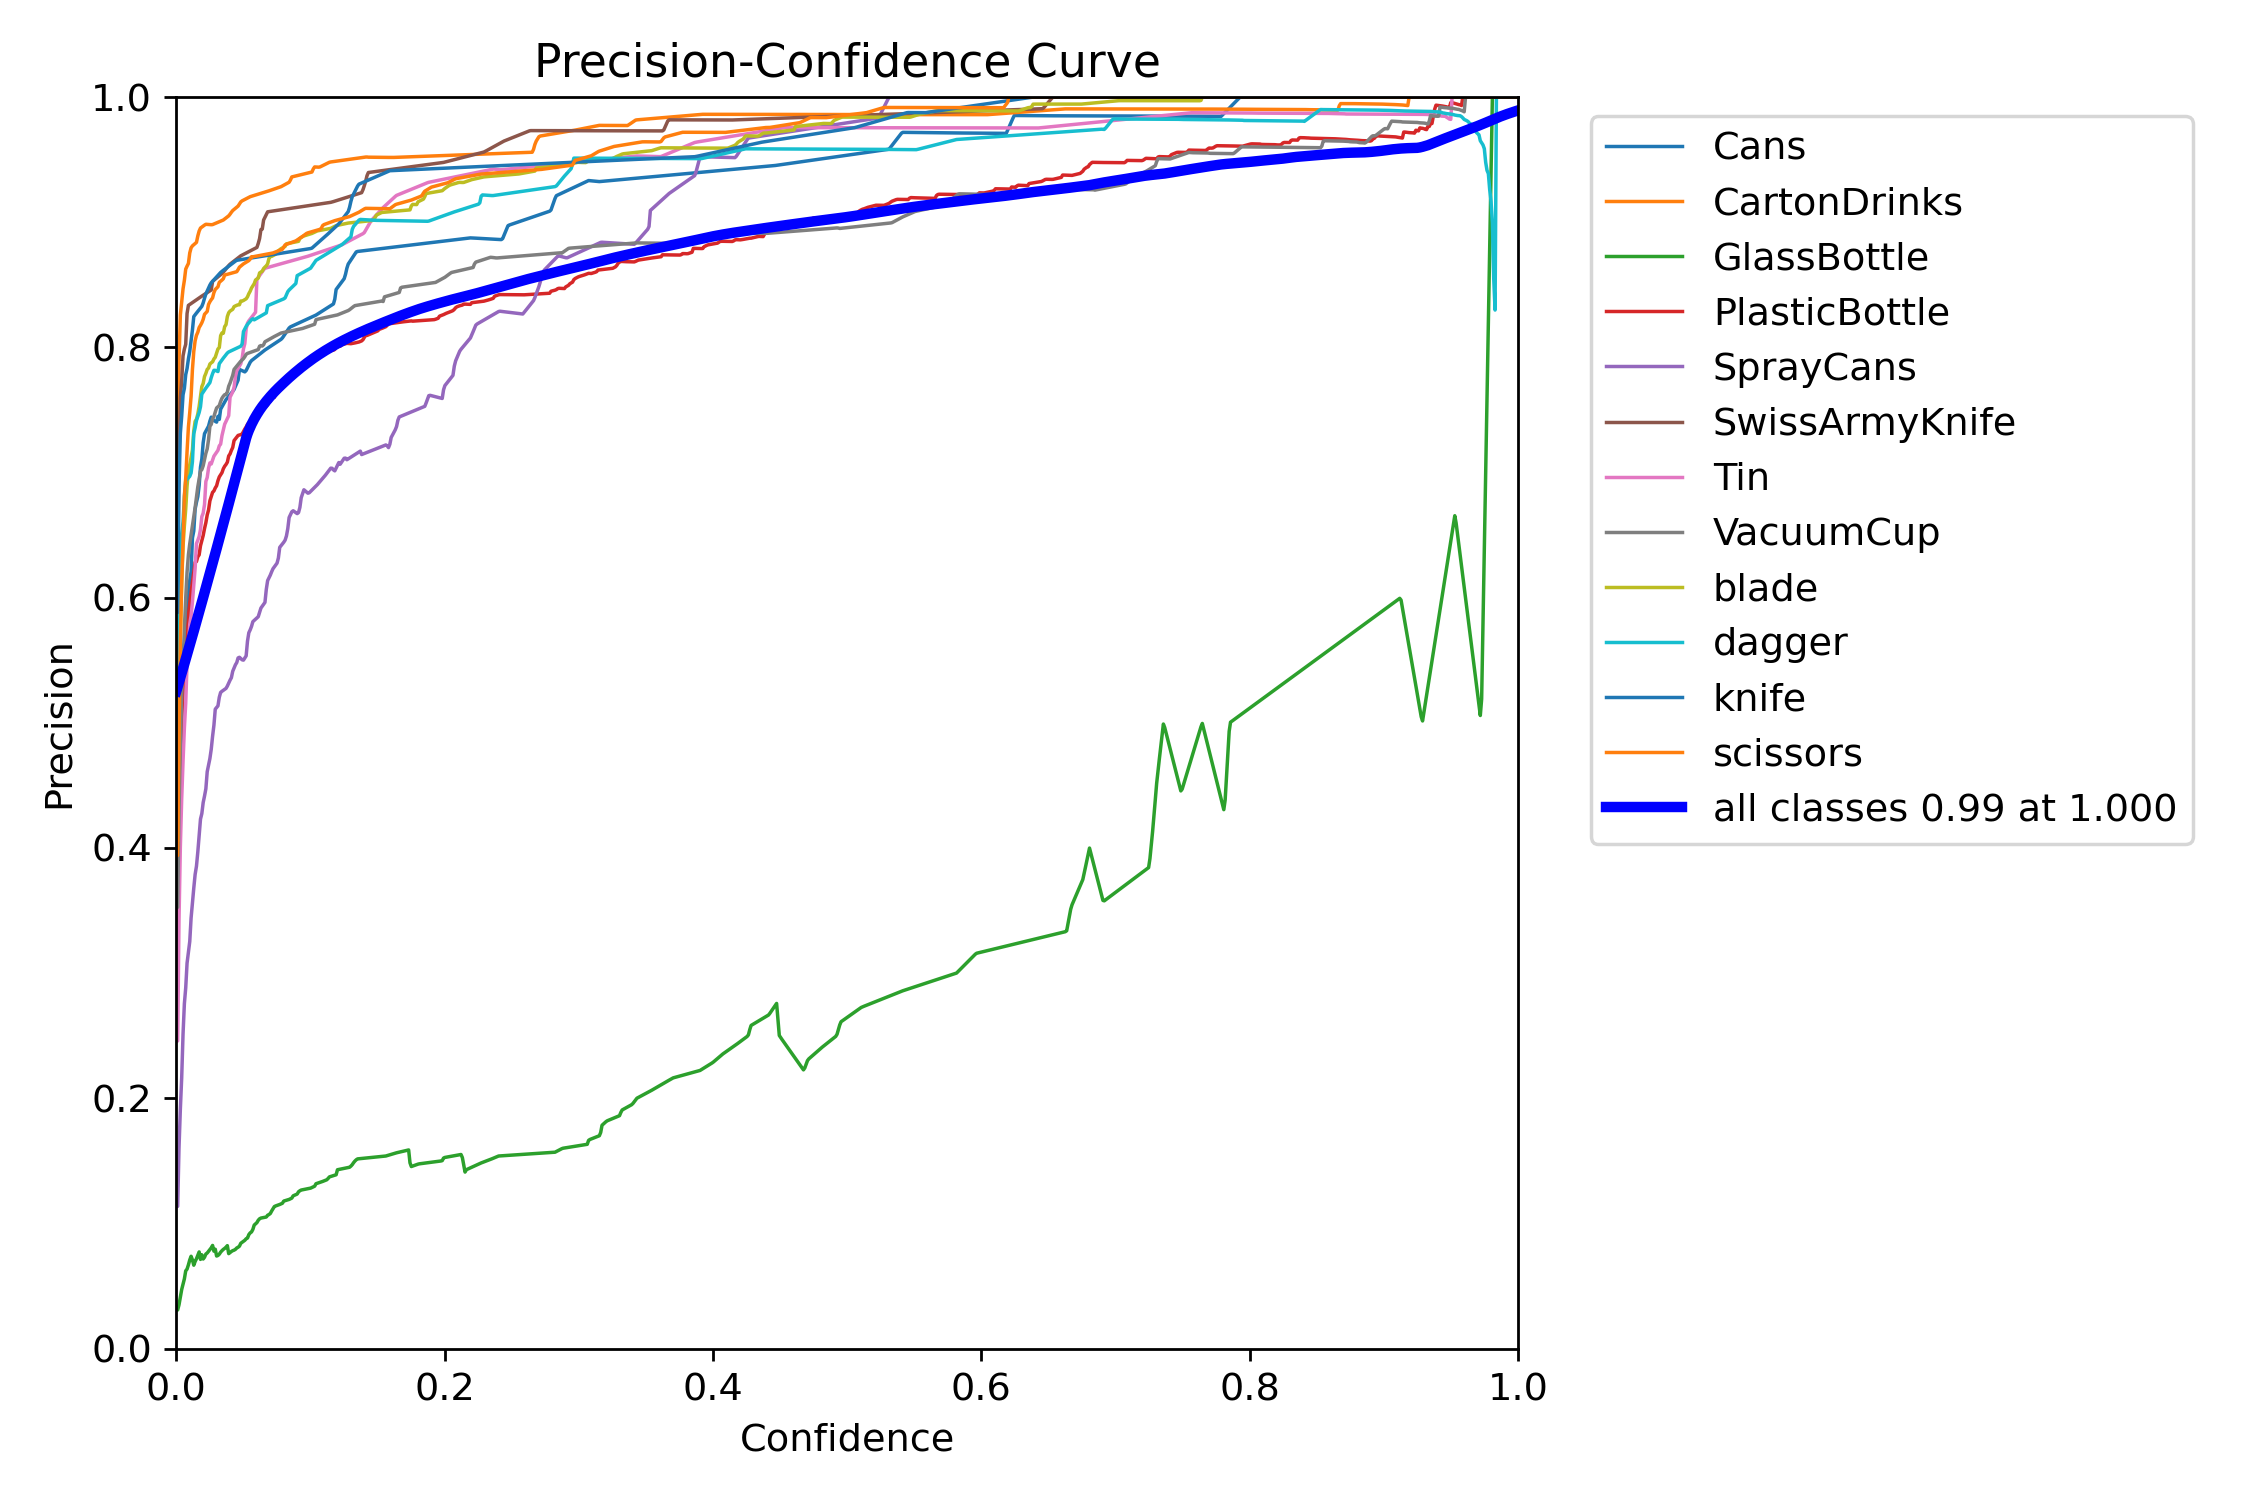

📊 R_curve.png


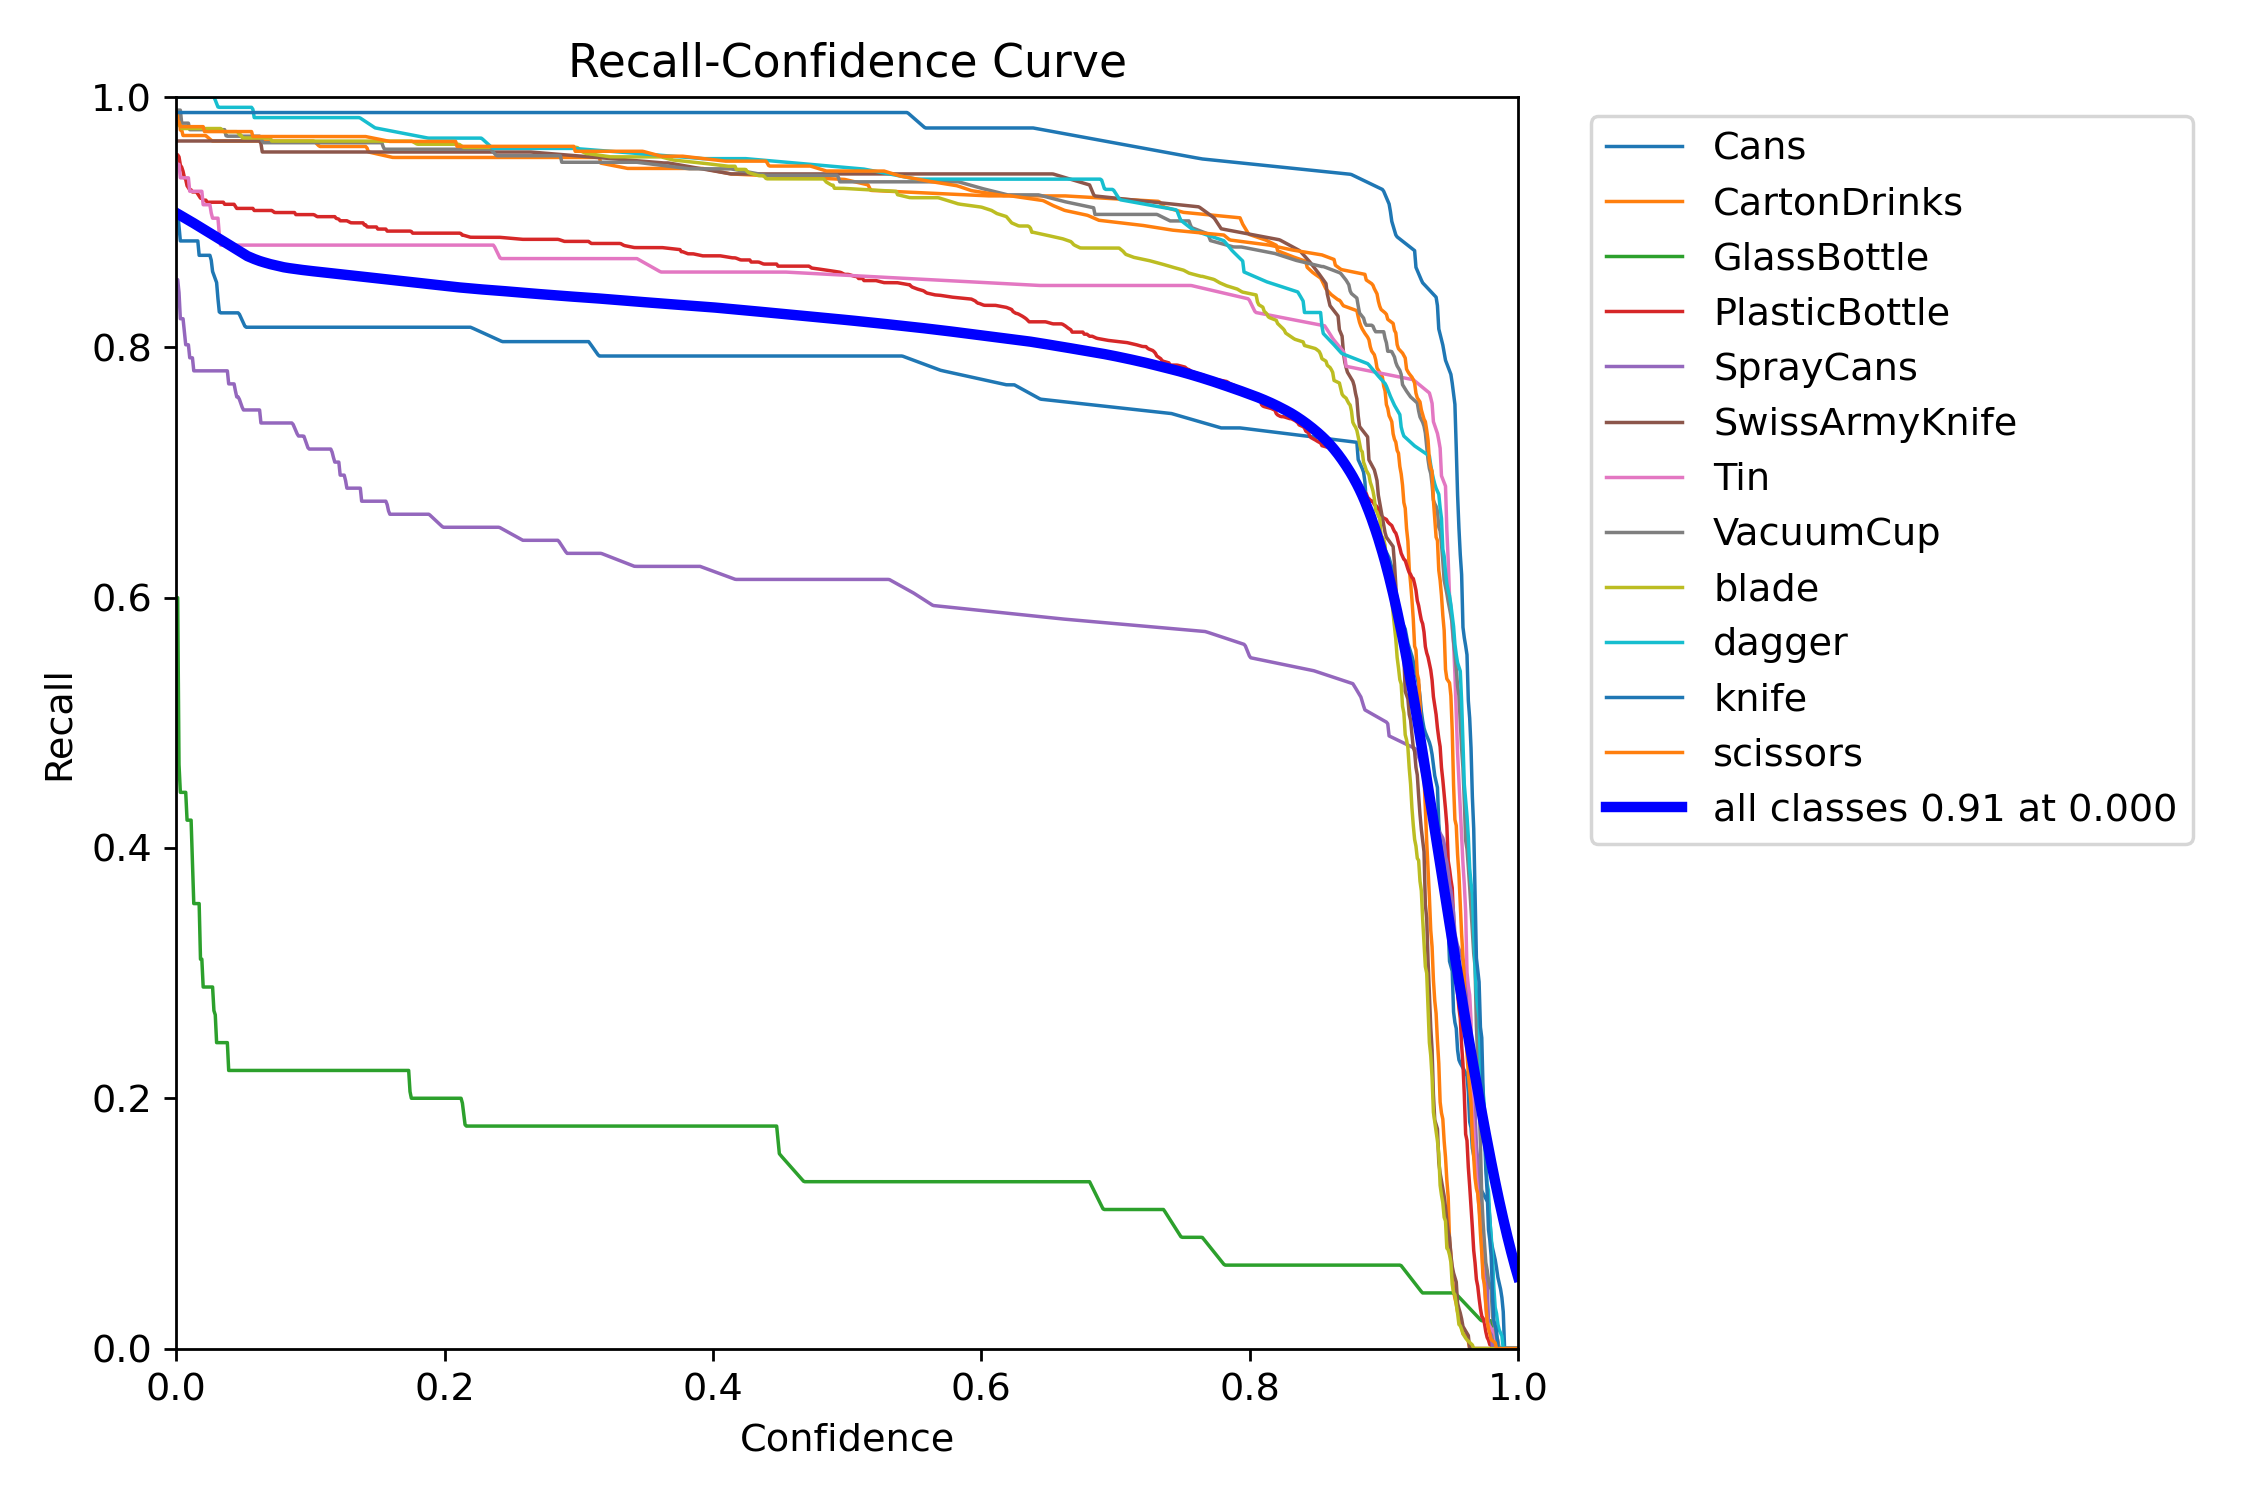

📊 PR_curve.png


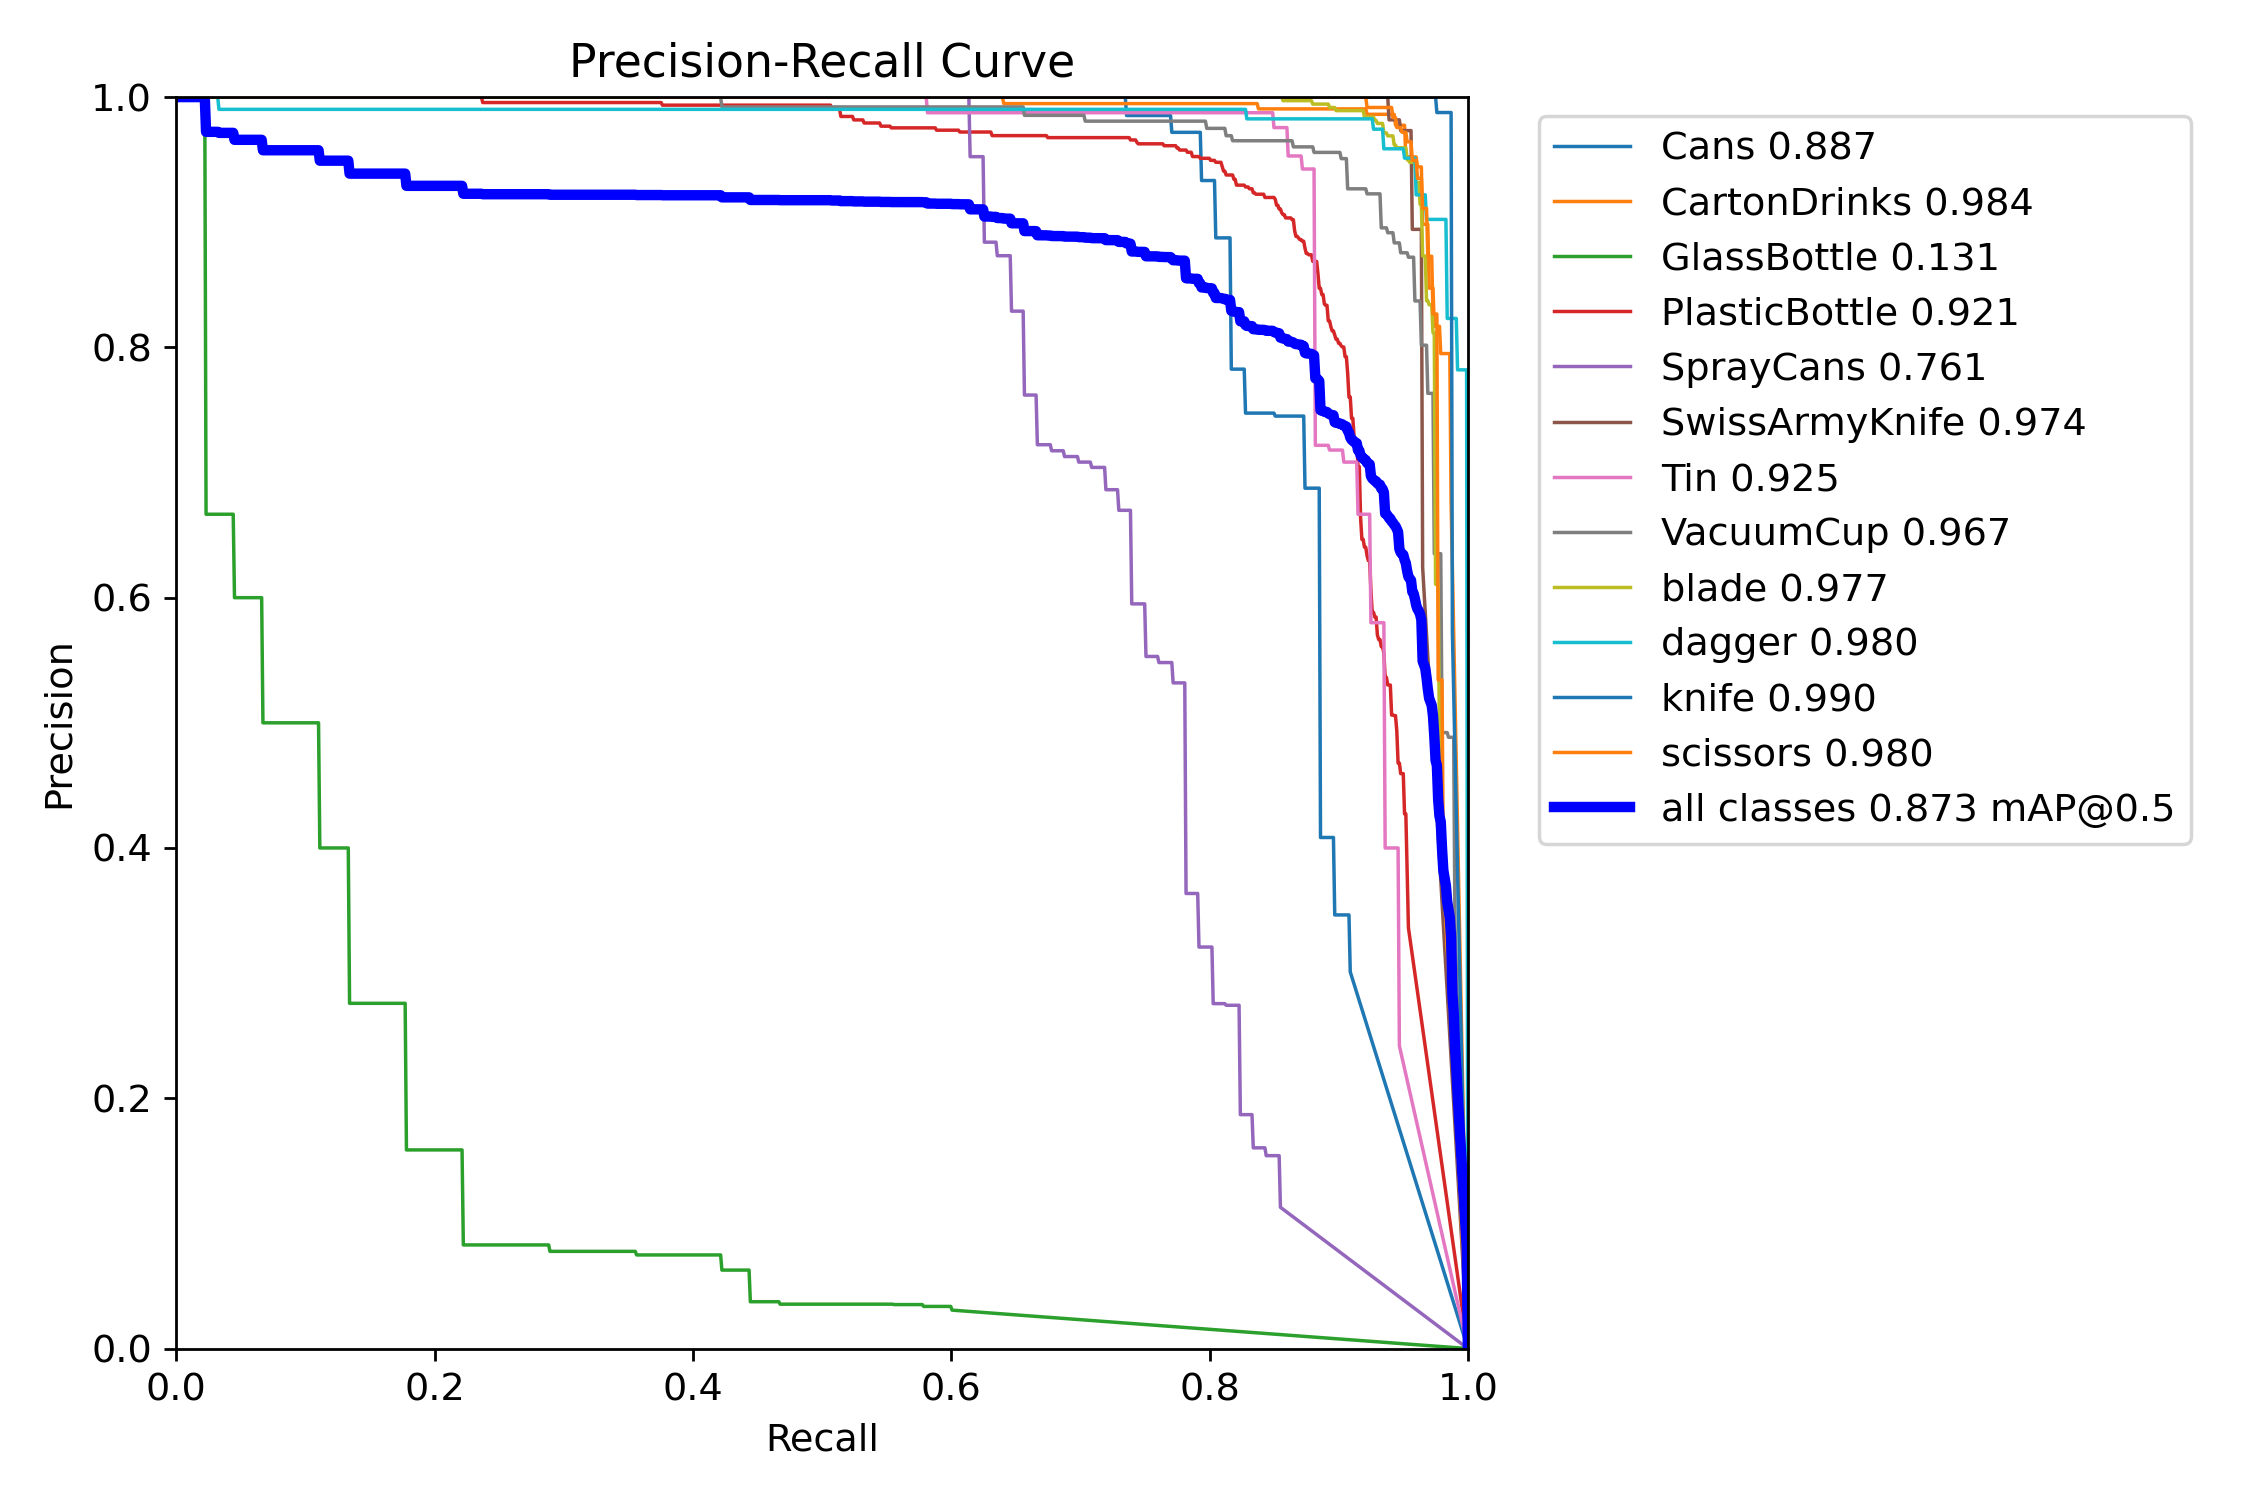

📊 F1_curve.png


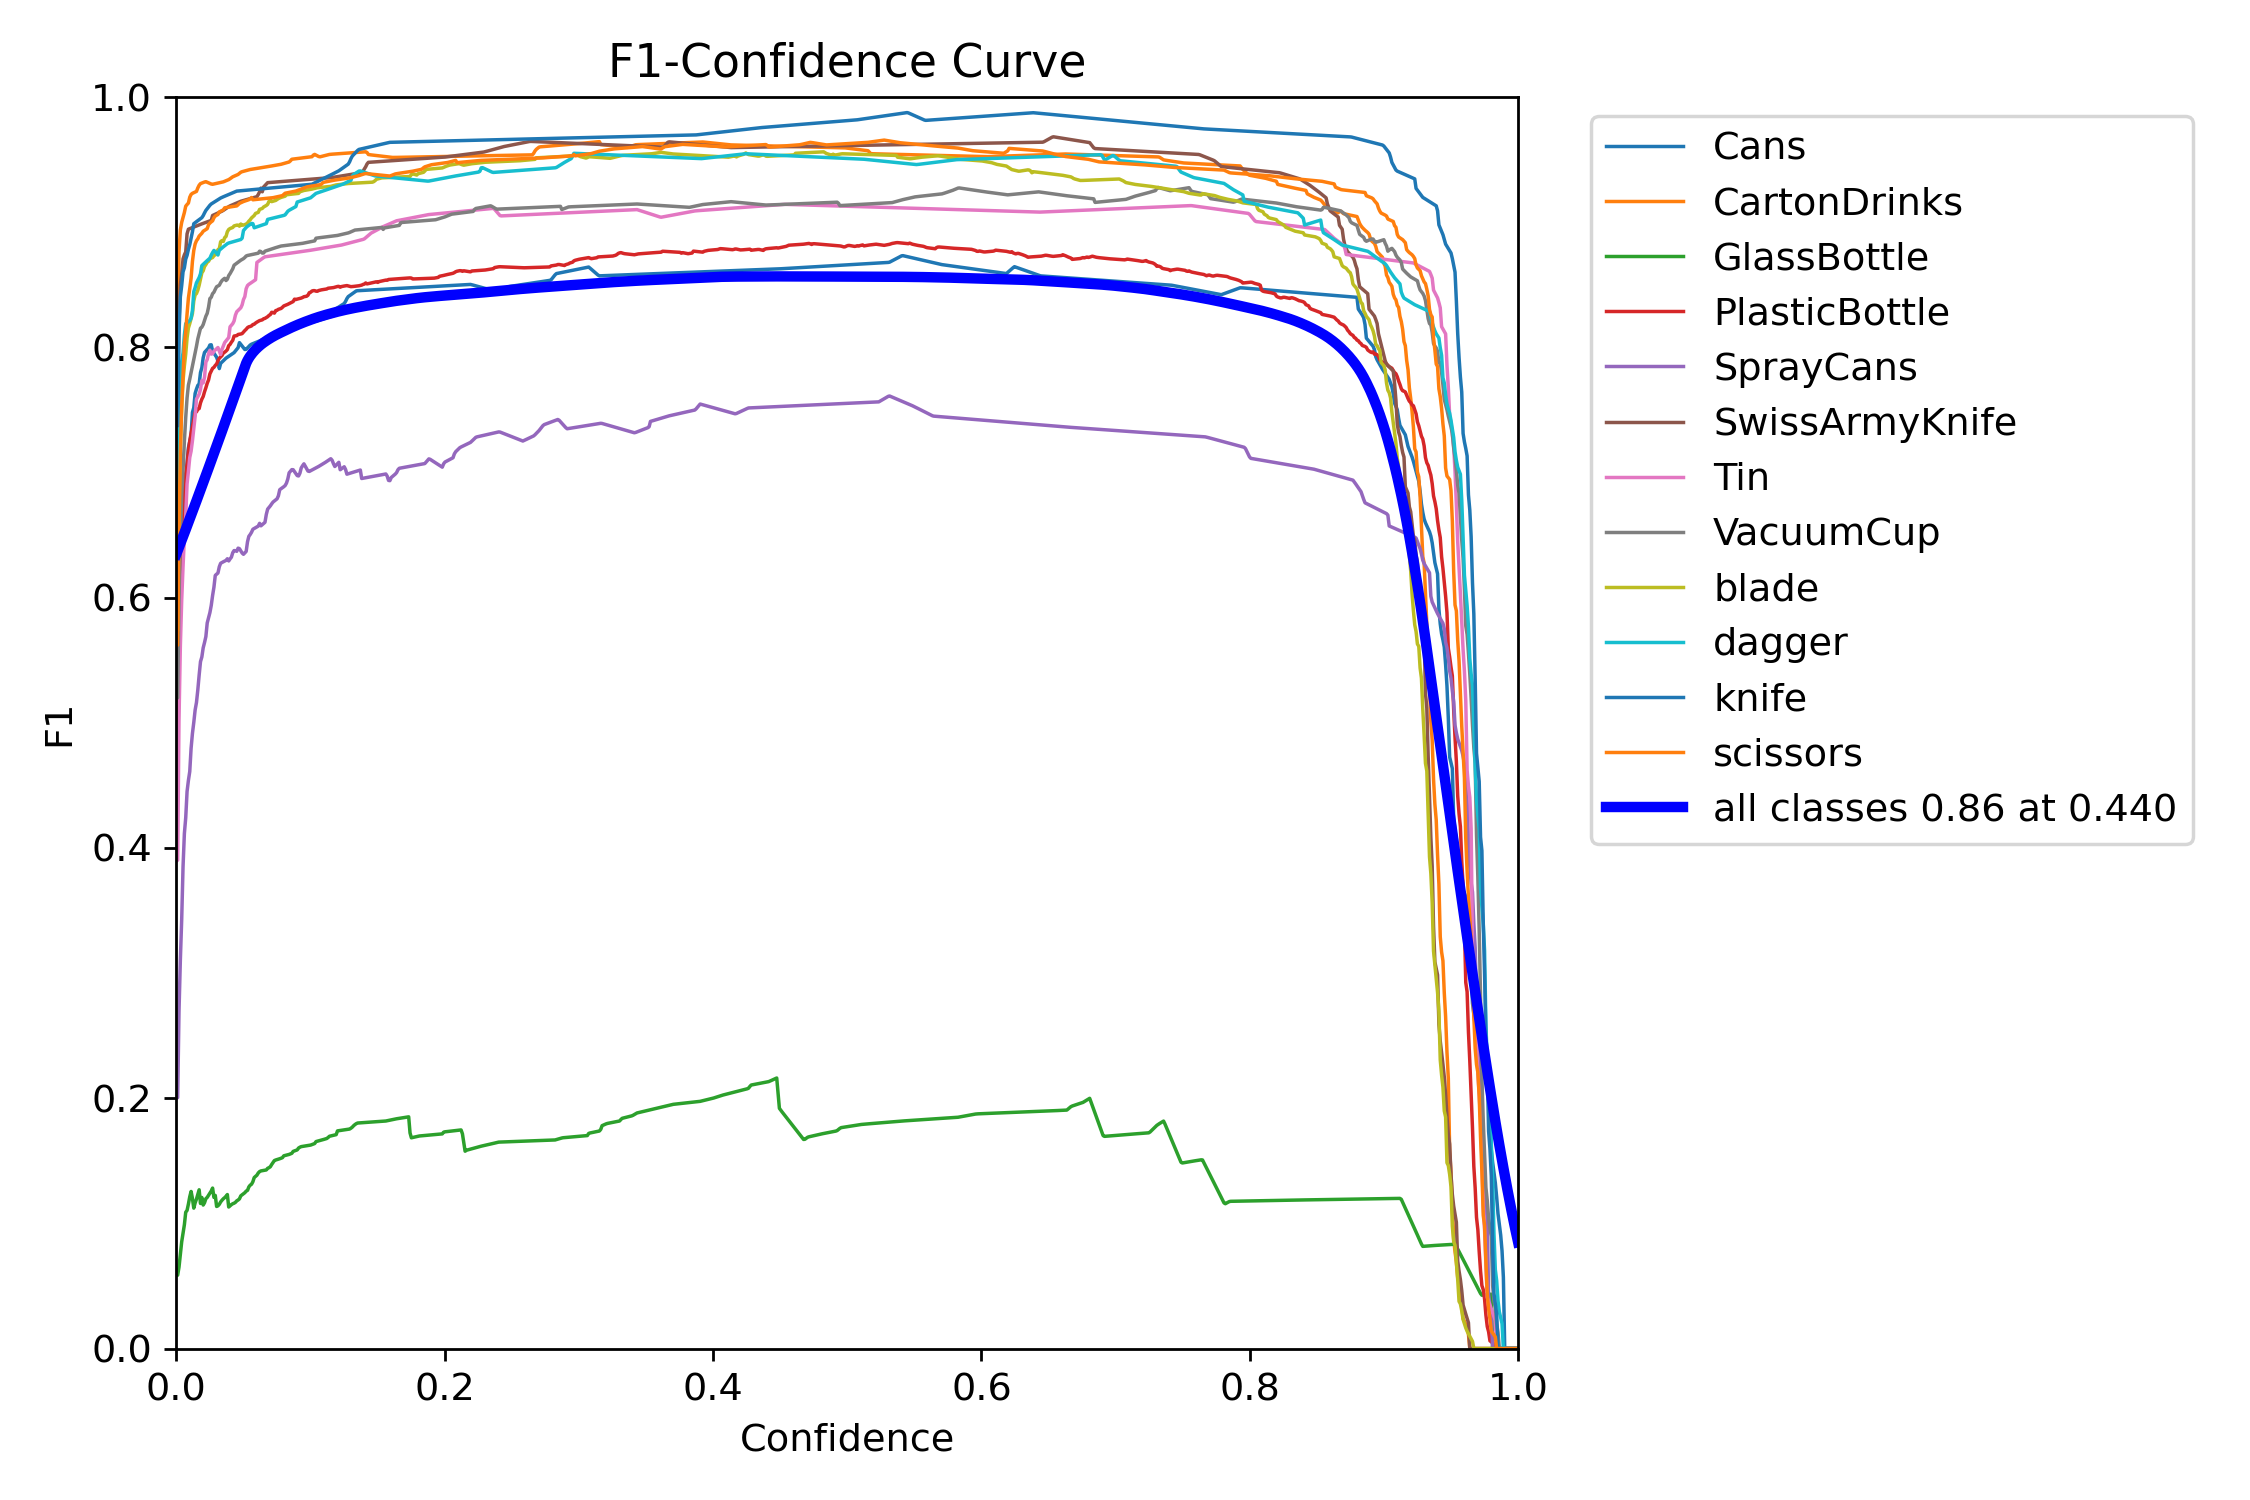

📊 confusion_matrix.png


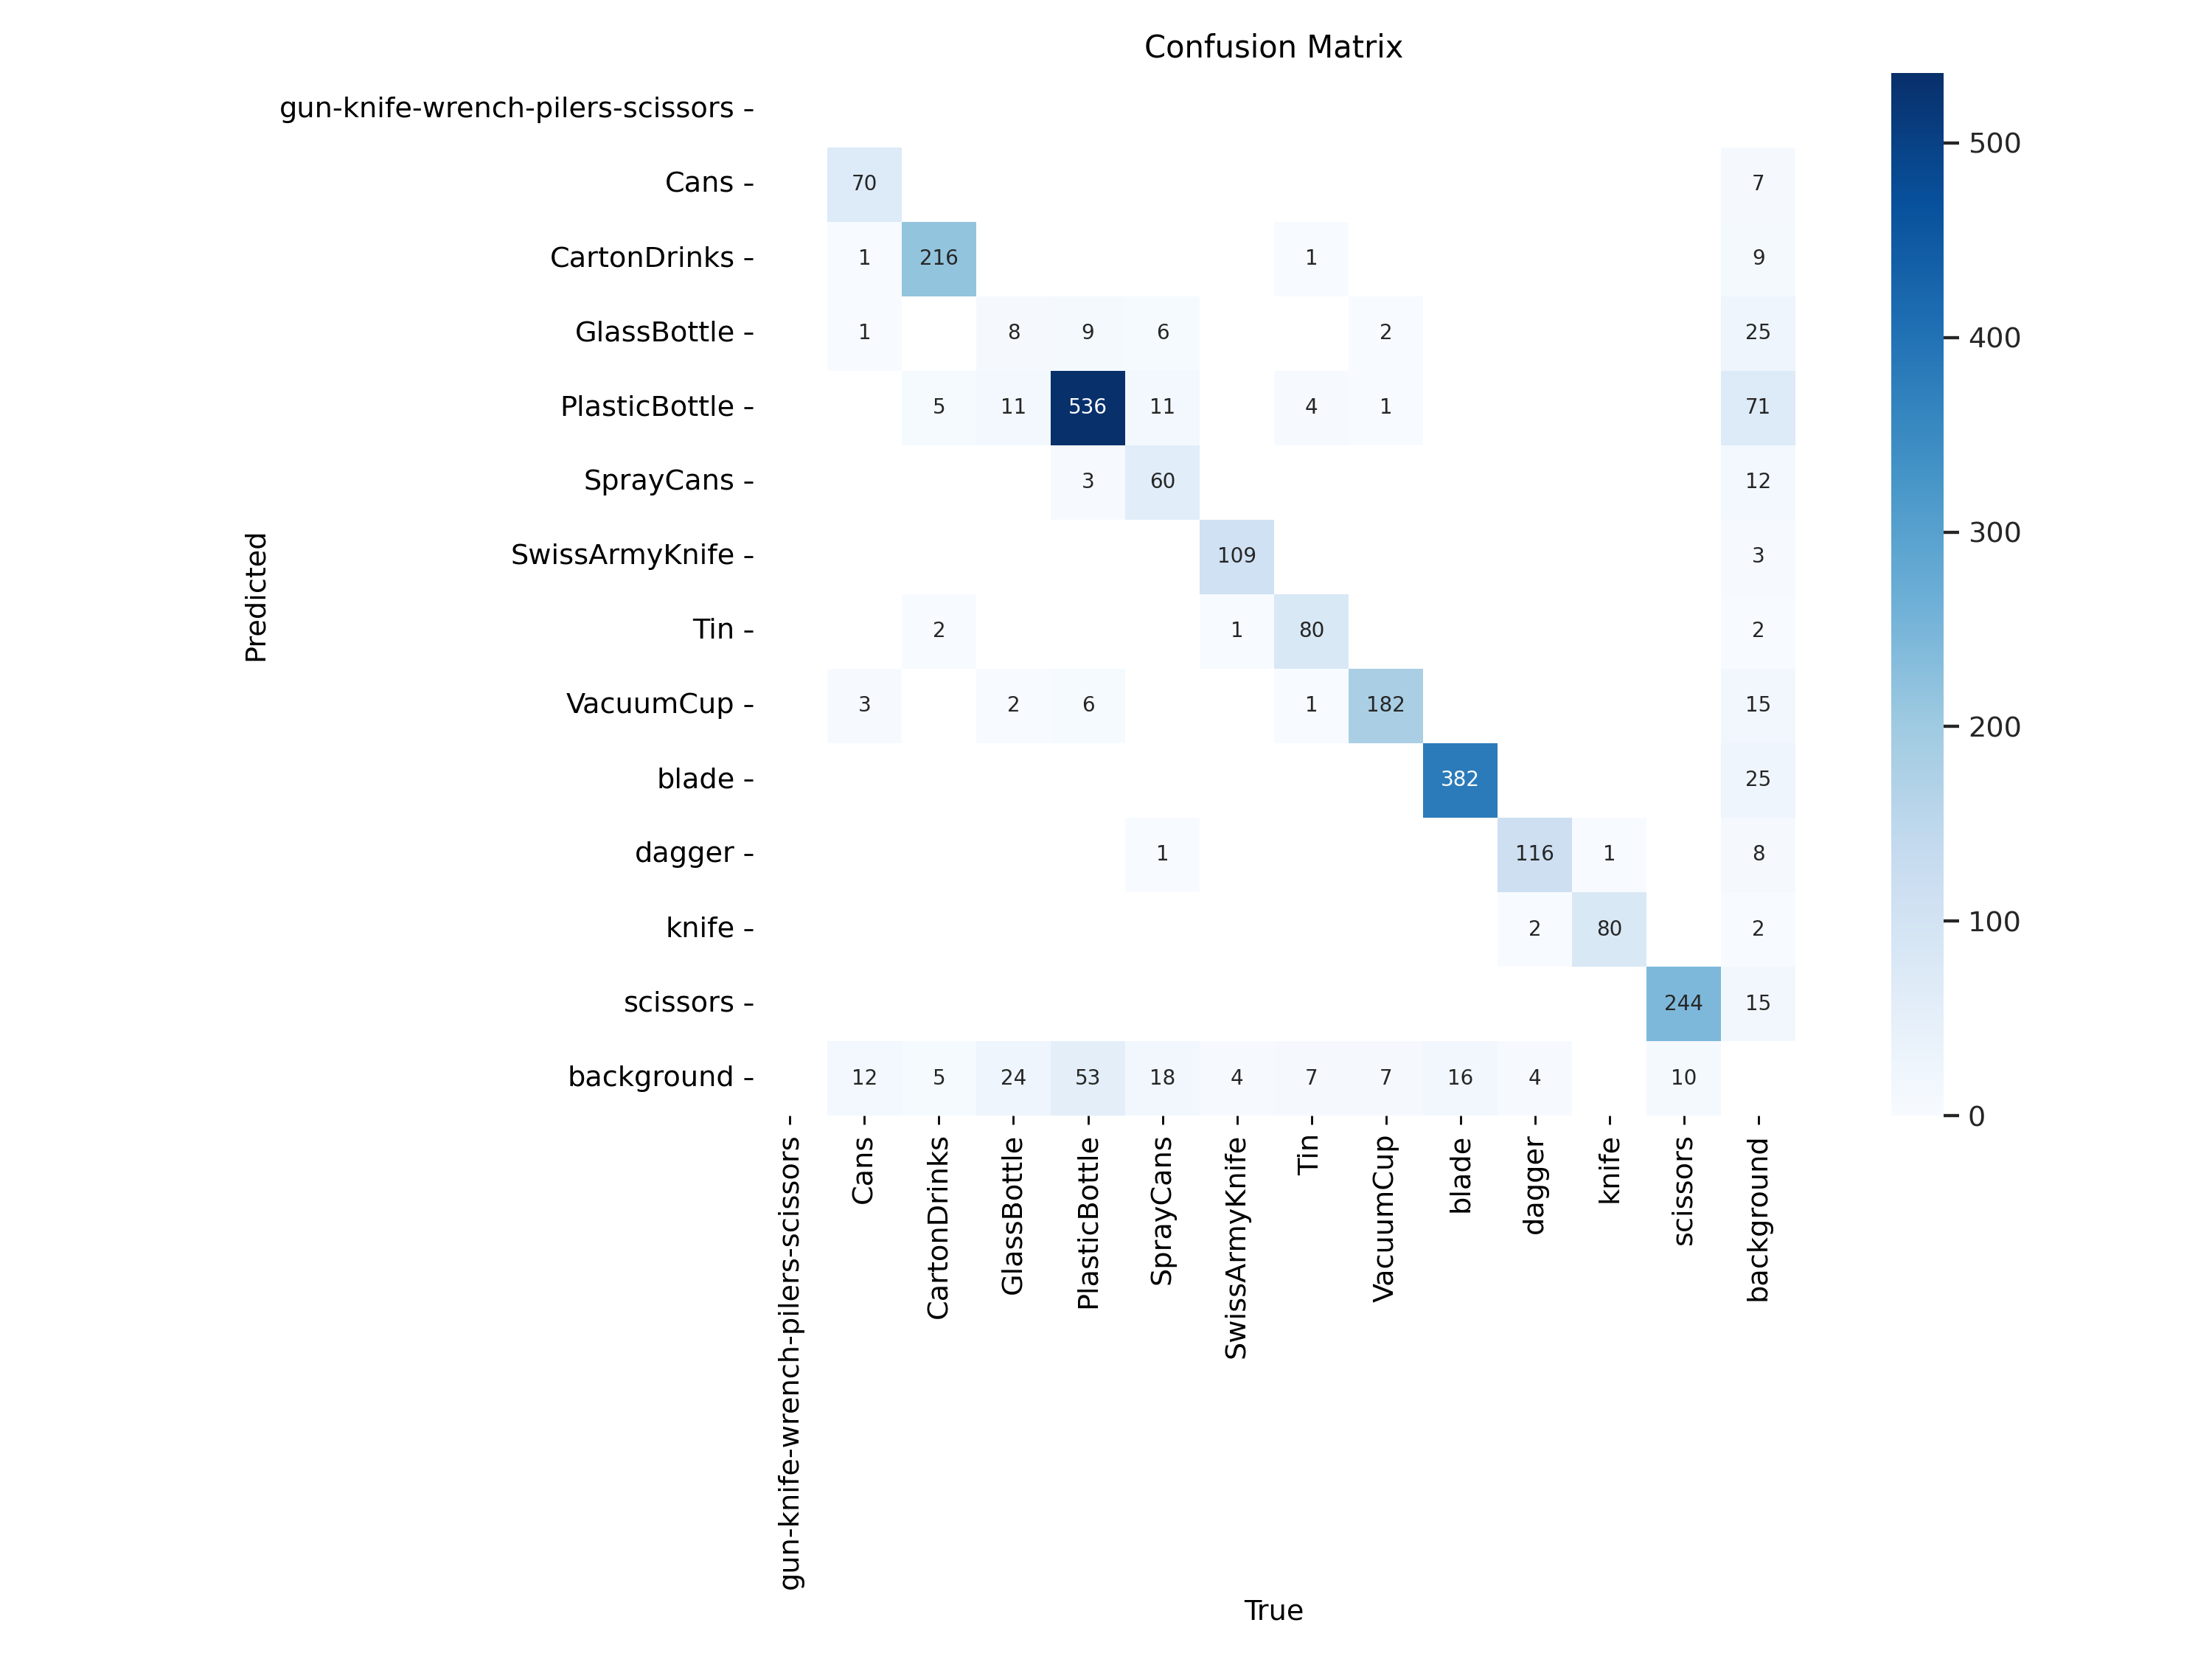

In [9]:
from IPython.display import Image, display

base_path = "/kaggle/working/yolo10n_xray_training"

metric_imgs = [
    "results.png",
    "P_curve.png",
    "R_curve.png",
    "PR_curve.png",
    "F1_curve.png",
    "confusion_matrix.png"
]

for img in metric_imgs:
    print(f"📊 {img}")
    display(Image(filename=f"{base_path}/{img}"))

In [5]:
from ultralytics import YOLO

# Load the best trained model
model = YOLO('/kaggle/working/yolo10n_xray_training/weights/best.pt')

# Evaluate on the test set (not validation!)
test_results = model.val(
    data="/kaggle/input/v11yaml/data.yaml",
    split="test",               # ✅ Ensure test set is used
    imgsz=640,
    save=True,                  # Save prediction images
    save_txt=True               # Save predictions in txt format
)


Ultralytics 8.3.111 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,267,703 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.8±2.8 MB/s, size: 34.8 KB)


val: Scanning /kaggle/input/xraydlcv2/test/labels... 956 images, 0 backgrounds, 0 corrupt: 100%|██████████| 956/956 [00:05<00:00, 162.43it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/xraydlcv2/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:12<00:00,  4.78it/s]


                   all        956       1421      0.819      0.648       0.69      0.584
                  Cans         37         47      0.768      0.352      0.426      0.381
          CartonDrinks         46         51      0.809      0.647      0.781      0.622
           GlassBottle         83        109      0.398      0.211       0.18      0.139
         PlasticBottle        488        590      0.789      0.705       0.76      0.628
             SprayCans         90        114      0.486      0.184      0.232      0.163
        SwissArmyKnife         17         17      0.937      0.878      0.907      0.663
                   Tin         45         49       0.97      0.592      0.672      0.561
             VacuumCup        314        321      0.871      0.882      0.909      0.829
                 blade         27         34      0.857      0.706      0.721      0.571
                dagger         19         19      0.986      0.895      0.911      0.854
                 knif

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val


In [8]:
print(f"mAP@0.5       : {test_results.box.map50:.4f}")
print(f"mAP@0.5:0.95   : {test_results.box.map:.4f}")
print(f"Precision      : {test_results.box.mp:.4f}")   # Mean Precision
print(f"Recall         : {test_results.box.mr:.4f}")   # Mean Recall


mAP@0.5       : 0.6900
mAP@0.5:0.95   : 0.5837
Precision      : 0.8190
Recall         : 0.6478


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
import shutil

# Define the name of the zip file
output_zip_path = "/kaggle/working/yolo10n_xray_training_results.zip"

# Zip the entire /kaggle/working directory
shutil.make_archive(base_name=output_zip_path.replace(".zip", ""), format='zip', root_dir="/kaggle/working")

print("Zipping completed. Download from the 'Files' tab on the right.")
